### **RETO 1 –EXPLORACIÓN INICIAL DE LOS DATOS**

#### Revision Inicial sobre dataset "Locales"

In [9]:
import requests
import io
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
# Accedemos al texto
locales_df = pd.read_csv("locales202312.csv",delimiter = ";")  # o read_json, read_excel, etc.

In [11]:
locales_df.info() # chequeo el tipo de dato, columnas, non-null

<class 'pandas.DataFrame'>
RangeIndex: 151162 entries, 0 to 151161
Data columns (total 48 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id_local                   151162 non-null  int64  
 1   id_distrito_local          151162 non-null  int64  
 2   desc_distrito_local        151162 non-null  str    
 3   id_barrio_local            151162 non-null  int64  
 4   desc_barrio_local          151162 non-null  str    
 5   cod_barrio_local           151162 non-null  int64  
 6   id_seccion_censal_local    151162 non-null  int64  
 7   desc_seccion_censal_local  151162 non-null  int64  
 8   coordenada_x_local         151162 non-null  float64
 9   coordenada_y_local         151162 non-null  float64
 10  id_tipo_acceso_local       151162 non-null  int64  
 11  desc_tipo_acceso_local     151162 non-null  str    
 12  id_situacion_local         151162 non-null  int64  
 13  desc_situacion_local       151162 non-nu

In [12]:
#modifico el tipo de dato de las columnas que hacen referencia a hora
locales_df["hora_apertura1"].dropna().unique()[:20]


<StringArray>
['09:00', '12:00', '08:00', '06:00', '00:00', '10:00', '00:08', '07:00',
 '11:00', '08:30', '02:00', '11:30', '08:15', '17:00', '00:30', '23:30',
 '01:00', '09:30', '13:00', '10:30']
Length: 20, dtype: str

In [13]:
#limpio las columna fecha. Mantengo el tipo str, dado que intente cambiarlo a datetime.time pero este tipo no es compatible con Mongo.

def clean_hour_str(col):
    return (
        col
        .astype(str)
        .str.strip()
        .replace(
            {
                "": None,
                "nan": None,
                "NaN": None,
                "SIN DATO": None,
                "VALOR NULO EN ORIGEN": None,
            }
        )
        .str.slice(0, 5)   # "09:00:00" -> "09:00"
    )
cols_hora = [
    "hora_apertura1",
    "hora_cierre1",
    "hora_apertura2",
    "hora_cierre2"
]

for c in cols_hora:
    locales_df[c] = clean_hour_str(locales_df[c])

In [6]:
#chequeo que la limpieza este lista
locales_df["hora_apertura1"].unique()[:20]



<StringArray>
['09:00',     nan, '12:00', '08:00', '06:00', '00:00', '10:00', '00:08',
 '07:00', '11:00', '08:30', '02:00', '11:30', '08:15', '17:00', '00:30',
 '23:30', '01:00', '09:30', '13:00']
Length: 20, dtype: str

In [7]:
locales_df.head()

id_local  id_distrito_local   desc_distrito_local  id_barrio_local  \
0  20000596                  2  ARGANZUELA                        203   
1  20000605                  2  ARGANZUELA                        201   
2  20000669                  2  ARGANZUELA                        202   
3  20000709                  2  ARGANZUELA                        202   
4  20000721                  2  ARGANZUELA                        201   

      desc_barrio_local  cod_barrio_local  id_seccion_censal_local  \
0  CHOPERA                              3                     2043   
1  IMPERIAL                             1                     2107   
2  ACACIAS                              2                     2096   
3  ACACIAS                              2                     2029   
4  IMPERIAL                             1                     2089   

   desc_seccion_censal_local  coordenada_x_local  coordenada_y_local  ...  \
0                         43            440788.6           4471857.5  ...   
1                        107            439316.6           4472540.5  ...   
2                         96            439770.6           4472407.5  ...   
3                         29            440355.6           4472282.5  ...   
4                         89            439312.6           4472870.5  ...   

   id_local_agrupado                rotulo  cod_postal hora_apertura1  \
0                 D1               LA CAÑA       28045          09:00   
1                 01   CAFETERIA PIRAMIDES       28005            NaN   
2                 M1           BAR MELILLA       28005            NaN   
3                 IZ  SUPERMERCADOS SIMPLY       28005            NaN   
4                  C    ARROCERIA IMPERIAL       28005            NaN   

   hora_apertura2 hora_cierre1 hora_cierre2                 fx_carga  \
0             NaN          NaN        22:00  2023-12-08 07:01:00.047   
1             NaN          NaN          NaN  2023-12-08 07:01:00.047   
2             NaN          NaN          NaN  2023-12-08 07:01:00.047   
3             NaN          NaN          NaN  2023-12-08 07:01:00.047   
4             NaN          NaN          NaN  2023-12-08 07:01:00.047   

   fx_datos_ini fx_datos_fin  
0    2023-12-01   2023-12-01  
1    2023-12-01   2023-12-01  
2    2023-12-01   2023-12-01  
3    2023-12-01   2023-12-01  
4    2023-12-01   2023-12-01  

[5 rows x 48 columns]

In [8]:
locales_df["id_local"].unique() #chequeo que el ID este definido

array([ 20000596,  20000605,  20000669, ..., 300022008, 300022009,
       300022017], shape=(151162,))

In [9]:
print(locales_df["id_local"].duplicated().sum()) #deteccion de duplicados

0


In [14]:
#limpieza de espacios extras
locales_df["desc_distrito_local"] = (
    locales_df["desc_distrito_local"]
        .str.strip()
)
locales_df["desc_barrio_local"] = (
    locales_df["desc_barrio_local"]
        .str.strip()
)



#### Revision Inicial sobre dataset "Actividad Economica"

In [11]:
# Accedemos al texto
actividad_economica_df = pd.read_csv("actividadeconomica202312.csv",delimiter = ";",dtype={
        "id_division": "string",
        "id_epigrafe": "string"
    })  # o read_json, read_excel, etc.

In [12]:
actividad_economica_df.info() # chequeo el tipo de dato, columnas, non-null

<class 'pandas.DataFrame'>
RangeIndex: 169559 entries, 0 to 169558
Data columns (total 49 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id_local                   169559 non-null  int64  
 1   id_distrito_local          169559 non-null  int64  
 2   desc_distrito_local        169559 non-null  str    
 3   id_barrio_local            169559 non-null  int64  
 4   desc_barrio_local          169559 non-null  str    
 5   cod_barrio_local           169559 non-null  int64  
 6   id_seccion_censal_local    169559 non-null  int64  
 7   desc_seccion_censal_local  169559 non-null  int64  
 8   coordenada_x_local         169559 non-null  float64
 9   coordenada_y_local         169559 non-null  float64
 10  id_tipo_acceso_local       169559 non-null  int64  
 11  desc_tipo_acceso_local     169559 non-null  str    
 12  id_situacion_local         169559 non-null  int64  
 13  desc_situacion_local       169559 non-nu

In [13]:
actividad_economica_df.head()


id_local  id_distrito_local   desc_distrito_local  id_barrio_local  \
0  270574777                 20  SAN BLAS-CANILLEJAS              2004   
1  270574779                 20  SAN BLAS-CANILLEJAS              2004   
2  270574786                 11  CARABANCHEL                      1101   
3  270574793                 16  HORTALEZA                        1606   
4  270574793                 16  HORTALEZA                        1606   

      desc_barrio_local  cod_barrio_local  id_seccion_censal_local  \
0  ARCOS                                4                    20044   
1  ARCOS                                4                    20044   
2  COMILLAS                             1                    11013   
3  VALDEFUENTES                         6                    16124   
4  VALDEFUENTES                         6                    16124   

   desc_seccion_censal_local  coordenada_x_local  coordenada_y_local  ...  \
0                         44                0.00                 0.0  ...   
1                         44                0.00                 0.0  ...   
2                         13                0.00                 0.0  ...   
3                        124           448470.03           4482377.0  ...   
4                        124           448470.03           4482377.0  ...   

                                      rotulo id_seccion  \
0    CAMPAMENTO DE VERANO CEIP MARIA MOLINER          P   
1  CAMPAMENTO VERANO CEE FUNDACION GOYENECHE          P   
2                      COLEGIO PUBLICO PERU           P   
3                                   SUPERCOR          G   
4                                   SUPERCOR          G   

                                        desc_seccion id_division  \
0                                          EDUCACIÓN          85   
1                                          EDUCACIÓN          85   
2                                          EDUCACIÓN          85   
3  COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...          47   
4  COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...          47   

                                       desc_division id_epigrafe  \
0                                          EDUCACIÓN      855002   
1                                          EDUCACIÓN      855002   
2                                          EDUCACIÓN      855002   
3  COMERCIO AL POR MENOR, EXCEPTO DE VEHÍCULOS DE...      472206   
4  COMERCIO AL POR MENOR, EXCEPTO DE VEHÍCULOS DE...      472401   

                                       desc_epigrafe                fx_carga  \
0  ENSEÑANZA NO REGLADA (DEPORTIVA Y RECREATIVA, ...  2023-12-08 07:00:45.89   
1  ENSEÑANZA NO REGLADA (DEPORTIVA Y RECREATIVA, ...  2023-12-08 07:00:45.89   
2  ENSEÑANZA NO REGLADA (DEPORTIVA Y RECREATIVA, ...  2023-12-08 07:00:45.89   
3  COMERCIO AL POR MENOR DE AVES, HUEVOS Y CAZA S...  2023-12-08 07:00:45.89   
4  COMERCIO AL POR MENOR DE PAN Y PRODUCTOS DE PA...  2023-12-08 07:00:45.89   

   fx_datos_ini fx_datos_fin  
0    2023-12-01   2023-12-01  
1    2023-12-01   2023-12-01  
2    2023-12-01   2023-12-01  
3    2023-12-01   2023-12-01  
4    2023-12-01   2023-12-01  

[5 rows x 49 columns]

In [14]:
actividad_economica_df.shape


(169559, 49)

In [15]:
#limpieza de espacios extras
actividad_economica_df["desc_distrito_local"] = (
    actividad_economica_df["desc_distrito_local"]
        .str.strip()
)
actividad_economica_df["desc_barrio_local"] = (
    actividad_economica_df["desc_barrio_local"]
        .str.strip()
)

In [16]:
actividad_economica_df.tail()


id_local  id_distrito_local desc_distrito_local  id_barrio_local  \
169554  285034687                 13  PUENTE DE VALLECAS             1302   
169555  285034688                 13  PUENTE DE VALLECAS             1302   
169556  285034692                 13  PUENTE DE VALLECAS             1302   
169557  285034693                 13  PUENTE DE VALLECAS             1302   
169558  285034694                 13  PUENTE DE VALLECAS             1302   

       desc_barrio_local  cod_barrio_local  id_seccion_censal_local  \
169554         SAN DIEGO                 2                    13043   
169555         SAN DIEGO                 2                    13043   
169556         SAN DIEGO                 2                    13043   
169557         SAN DIEGO                 2                    13043   
169558         SAN DIEGO                 2                    13043   

        desc_seccion_censal_local  coordenada_x_local  coordenada_y_local  \
169554                         43           443341.56           4471921.5   
169555                         43           443339.56           4471938.5   
169556                         43           443460.56           4471871.5   
169557                         43           443437.56           4471924.5   
169558                         43           443423.56           4471907.5   

        ...                 rotulo id_seccion  \
169554  ...  BARBER SHOP NEW STYLE          S   
169555  ...            OLE VENDING          G   
169556  ...      MARLIN COMPRO ORO          G   
169557  ...          SIN ACTIVIDAD         -1   
169558  ...          SIN ACTIVIDAD         -1   

                                             desc_seccion id_division  \
169554                                    OTROS SERVICIOS          96   
169555  COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...          47   
169556  COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...          47   
169557                               VALOR NULO EN ORIGEN          -1   
169558                               VALOR NULO EN ORIGEN          -1   

                                            desc_division id_epigrafe  \
169554                         OTROS SERVICIOS PERSONALES      960201   
169555  COMERCIO AL POR MENOR, EXCEPTO DE VEHÍCULOS DE...      479002   
169556  COMERCIO AL POR MENOR, EXCEPTO DE VEHÍCULOS DE...      477701   
169557                               VALOR NULO EN ORIGEN          -1   
169558                               VALOR NULO EN ORIGEN          -1   

                                            desc_epigrafe  \
169554                             SERVICIO DE PELUQUERIA   
169555    COMERCIO AL POR MENOR CON MAQUINAS EXPENDEDORAS   
169556  COMERCIO AL POR MENOR DE JOYAS, RELOJERIA Y BI...   
169557                               VALOR NULO EN ORIGEN   
169558                               VALOR NULO EN ORIGEN   

                       fx_carga  fx_datos_ini fx_datos_fin  
169554  2023-12-08 07:00:46.793    2023-12-01   2023-12-01  
169555  2023-12-08 07:00:46.793    2023-12-01   2023-12-01  
169556  2023-12-08 07:00:46.793    2023-12-01   2023-12-01  
169557  2023-12-08 07:00:46.793    2023-12-01   2023-12-01  
169558  2023-12-08 07:00:46.793    2023-12-01   2023-12-01  

[5 rows x 49 columns]

In [17]:
actividad_economica_df.columns

Index(['id_local', 'id_distrito_local', 'desc_distrito_local',
       'id_barrio_local', 'desc_barrio_local', 'cod_barrio_local',
       'id_seccion_censal_local', 'desc_seccion_censal_local',
       'coordenada_x_local', 'coordenada_y_local', 'id_tipo_acceso_local',
       'desc_tipo_acceso_local', 'id_situacion_local', 'desc_situacion_local',
       'id_vial_edificio', 'clase_vial_edificio', 'desc_vial_edificio',
       'id_ndp_edificio', 'id_clase_ndp_edificio', 'nom_edificio',
       'num_edificio', 'cal_edificio', 'secuencial_local_PC', 'id_vial_acceso',
       'clase_vial_acceso', 'desc_vial_acceso', 'id_ndp_acceso',
       'id_clase_ndp_acceso', 'nom_acceso', 'num_acceso', 'cal_acceso',
       'coordenada_x_agrupacion', 'coordenada_y_agrupacion', 'id_agrupacion',
       'nombre_agrupacion', 'id_tipo_agrup', 'desc_tipo_agrup',
       'id_planta_agrupado', 'id_local_agrupado', 'rotulo', 'id_seccion',
       'desc_seccion', 'id_division', 'desc_division', 'id_epigrafe',
       'des

In [18]:
print(actividad_economica_df["id_local"].duplicated().sum()) #deteccion de duplicados. El resultado quiere decir que hay mas de una actividad asociada a algunos local_id

18398


#### Revision Inicial sobre dataset "Licencias"

In [19]:
# Accedemos al texto
licencias_df = pd.read_csv("licencias202312.csv",delimiter = ";")  # o read_json, read_excel, etc.

In [20]:
licencias_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 150829 entries, 0 to 150828
Data columns (total 49 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   id_local                      150829 non-null  int64  
 1   id_distrito_local             150829 non-null  int64  
 2   desc_distrito_local           150829 non-null  str    
 3   id_barrio_local               150829 non-null  int64  
 4   desc_barrio_local             150829 non-null  str    
 5   cod_barrio_local              150829 non-null  int64  
 6   id_seccion_censal_local       150829 non-null  int64  
 7   desc_seccion_censal_local     150829 non-null  int64  
 8   coordenada_x_local            150829 non-null  float64
 9   coordenada_y_local            150829 non-null  float64
 10  id_tipo_acceso_local          150829 non-null  int64  
 11  desc_tipo_acceso_local        150829 non-null  str    
 12  id_situacion_local            150829 non-null  int64  


In [21]:
licencias_df.head()

id_local  id_distrito_local   desc_distrito_local  id_barrio_local  \
0  270366725                  7  CHAMBERI                          704   
1  270433440                  8  FUENCARRAL-EL PARDO               804   
2  270433462                  8  FUENCARRAL-EL PARDO               806   
3  270433466                 13  PUENTE DE VALLECAS               1306   
4  270433476                  7  CHAMBERI                          703   

      desc_barrio_local  cod_barrio_local  id_seccion_censal_local  \
0  ALMAGRO                              4                     7092   
1  EL PILAR                             4                     8078   
2  VALVERDE                             6                     8117   
3  NUMANCIA                             6                    13177   
4  TRAFALGAR                            3                     7067   

   desc_seccion_censal_local  coordenada_x_local  coordenada_y_local  ...  \
0                         92           441214.60           4476496.5  ...   
1                         78           440308.62           4481076.5  ...   
2                        117           441275.62           4482618.5  ...   
3                        177           444171.56           4472011.5  ...   
4                         67           440591.60           4476258.5  ...   

                                              rotulo    ref_licencia  \
0  CAFE PLATINA                                  ...  350/2023/26343   
1                 CLINICA VETERINARIA GINZO DE LIMIA  108/2007/07166   
2                                           FARMACIA  500/2015/05608   
3                                           FARMACIA  220/2011/13207   
4                                        BAZAR MATEY  107/2004/07541   

   id_tipo_licencia                   desc_tipo_licencia  \
0                 4  Transmisión de licencia Urbanística   
1                 2                 Licencia Urbanística   
2                 1              Declaración Responsable   
3                 4  Transmisión de licencia Urbanística   
4                 2                 Licencia Urbanística   

   id_tipo_situacion_licencia       desc_tipo_situacion_licencia  \
0                           5  Transmisión de Licencia Concedida   
1                           2                          Concedida   
2                           1                     En tramitación   
3                           1                     En tramitación   
4                           2                          Concedida   

   Fecha_Dec_Lic                 fx_carga fx_datos_ini fx_datos_fin  
0     01/01/1900  2023-12-08 07:00:33.407   2023-12-01   2023-12-01  
1     31/08/2009  2023-12-08 07:00:33.407   2023-12-01   2023-12-01  
2     10/04/2015  2023-12-08 07:00:33.407   2023-12-01   2023-12-01  
3     15/11/2011  2023-12-08 07:00:33.407   2023-12-01   2023-12-01  
4     14/06/2005  2023-12-08 07:00:33.407   2023-12-01   2023-12-01  

[5 rows x 49 columns]

In [22]:
licencias_df.columns

Index(['id_local', 'id_distrito_local', 'desc_distrito_local',
       'id_barrio_local', 'desc_barrio_local', 'cod_barrio_local',
       'id_seccion_censal_local', 'desc_seccion_censal_local',
       'coordenada_x_local', 'coordenada_y_local', 'id_tipo_acceso_local',
       'desc_tipo_acceso_local', 'id_situacion_local', 'desc_situacion_local',
       'id_ndp_edificio', 'id_clase_ndp_edificio', 'id_vial_edificio',
       'clase_vial_edificio', 'desc_vial_edificio', 'nom_edificio',
       'num_edificio', 'cal_edificio', 'secuencial_local_PC', 'id_ndp_acceso',
       'id_clase_ndp_acceso', 'id_vial_acceso', 'clase_vial_acceso',
       'desc_vial_acceso', 'nom_acceso', 'num_acceso', 'cal_acceso',
       'coordenada_x_agrupacion', 'coordenada_y_agrupacion', 'id_agrupacion',
       'nombre_agrupacion', 'id_tipo_agrup', 'desc_tipo_agrup',
       'id_planta_agrupado', 'id_local_agrupado', 'rotulo', 'ref_licencia',
       'id_tipo_licencia', 'desc_tipo_licencia', 'id_tipo_situacion_licencia',


In [23]:
#limpieza de espacios extras
licencias_df["desc_distrito_local"] = (
    licencias_df["desc_distrito_local"]
        .str.strip()
)
licencias_df["desc_barrio_local"] = (
    licencias_df["desc_barrio_local"]
        .str.strip()
)


In [24]:
print(licencias_df["id_local"].duplicated().sum()) #deteccion de duplicados. El resultado quiere decir que hay mas de una licencia asociada a algunos local_id

76690


#### Revision Inicial sobre dataset "Terrazas"

In [33]:
# Accedemos al texto
terrazas_df = pd.read_csv("terrazas202312.csv",delimiter = ";")  # o read_json, read_excel, etc.

In [34]:
terrazas_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 6788 entries, 0 to 6787
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id_terraza                      6788 non-null   int64  
 1   id_local                        6788 non-null   int64  
 2   id_distrito_local               6788 non-null   int64  
 3   desc_distrito_local             6788 non-null   str    
 4   id_barrio_local                 6788 non-null   int64  
 5   desc_barrio_local               6788 non-null   str    
 6   id_ndp_edificio                 6788 non-null   int64  
 7   id_clase_ndp_edificio           6788 non-null   int64  
 8   id_vial_edificio                6788 non-null   int64  
 9   clase_vial_edificio             6788 non-null   str    
 10  desc_vial_edificio              6788 non-null   str    
 11  nom_edificio                    6788 non-null   str    
 12  num_edificio                    6788 non-null

In [35]:
terrazas_df.head()

id_terraza   id_local  id_distrito_local   desc_distrito_local  \
0          33  270403150                  4  SALAMANCA              
1        1168   80000291                  8  FUENCARRAL-EL PARDO    
2          42   40002970                  4  SALAMANCA              
3        1176   40002488                  4  SALAMANCA              
4          56  170000773                 17  VILLAVERDE             

   id_barrio_local     desc_barrio_local  id_ndp_edificio  \
0              404  GUINDALERA                   11018870   
1              806  VALVERDE                     20057165   
2              403  FUENTE DEL BERRO             11016907   
3              406  CASTELLANA                   11019901   
4             1704  LOS ROSALES                  11126803   

   id_clase_ndp_edificio  id_vial_edificio       clase_vial_edificio  ...  \
0                      1             42500  AVENIDA                   ...   
1                      1               127  CALLE                     ...   
2                      1          88952587  CALLE                     ...   
3                      1            411300  CALLE                     ...   
4                      1            786850  CALLE                     ...   

  mesas_aux_es mesas_aux_ra  mesas_es  mesas_ra  sillas_es  sillas_ra  \
0            0          0.0         9       9.0         27       27.0   
1            0          0.0        22      22.0         70       70.0   
2            0          0.0         4       0.0         16        0.0   
3            0          0.0        18      18.0         36       36.0   
4            0          0.0         4       0.0         16        0.0   

   cal_edificio                 fx_carga  fx_datos_ini fx_datos_fin  
0                2023-12-08 07:00:49.223    2023-12-01   2023-12-01  
1                2023-12-08 07:00:49.227    2023-12-01   2023-12-01  
2             A  2023-12-08 07:00:49.223    2023-12-01   2023-12-01  
3                2023-12-08 07:00:49.227    2023-12-01   2023-12-01  
4                2023-12-08 07:00:49.223    2023-12-01   2023-12-01  

[5 rows x 61 columns]

In [36]:
#limpieza de espacios extras
terrazas_df["desc_distrito_local"] = (
    terrazas_df["desc_distrito_local"]
        .str.strip()
)
terrazas_df["desc_barrio_local"] = (
    terrazas_df["desc_barrio_local"]
        .str.strip()
)

In [29]:
print(terrazas_df["id_terraza"].duplicated().sum()) #deteccion de duplicados

0


#### **Verificacion de relaciones entre ficheros**

In [30]:
# Verificacion de coincidencias entre IDs de datasets
porcentaje1 = locales_df["id_local"].isin(actividad_economica_df["id_local"]).mean() * 100
print(f"El {porcentaje1:.0f}% de los locales tiene al menos una actividad económica asociada.")

El 100% de los locales tiene al menos una actividad económica asociada.


In [31]:
porcentaje2 = locales_df["id_local"].isin(terrazas_df["id_local"]).mean() * 100
print(f"El {porcentaje2:.0f}% de los locales tiene al menos una terraza asociada.")

El 4% de los locales tiene al menos una terraza asociada.


In [32]:
porcentaje3 = locales_df["id_local"].isin(licencias_df["id_local"]).mean() * 100
print(f"El {porcentaje3:.0f}% de los locales tiene al menos una licencia asociada.")

El 49% de los locales tiene al menos una licencia asociada.


### RETO 2 – MODELADO DE DATOS

#### 1. Diseño del modelo de datos (Versión 1)


In [33]:
!pip install pandas pymongo
import pandas as pd
from pymongo import MongoClient


[notice] A new release of pip is available: 26.0 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
actividades_grp = (
    actividad_economica_df
    .groupby("id_local")
    .apply(
        lambda x: x
        .reset_index(drop=True)
        .to_dict(orient="records")
    )
    .to_dict()
)


terrazas_grp = (
    terrazas_df
    .groupby("id_local")
    .apply(
        lambda x: x
        .reset_index(drop=True)
        .to_dict(orient="records")
    )
    .to_dict()
)

licencias_grp = (
    licencias_df
    .groupby("id_local")
    .apply(
        lambda x: x
        .reset_index(drop=True)
        .to_dict(orient="records")
    )
    .to_dict()
)


In [35]:
documentos = []

for _, row in locales_df.iterrows():
    local_id = row["id_local"]

    doc = {
        "id_local": local_id,
        "local": row.drop(labels=["id_local"]).to_dict(),
        "actividades": actividades_grp.get(local_id, []),
        "terrazas": terrazas_grp.get(local_id, []),
        "licencias": licencias_grp.get(local_id, [])
    }

    documentos.append(doc)


In [36]:
client = MongoClient("mongodb://localhost:27017")
db = client["ayuntamiento"]

db.locales_final.drop()  # opcional
db.locales_final.insert_many(documentos)


InsertManyResult([ObjectId('698df919756e4d4b9b8cbd73'), ObjectId('698df919756e4d4b9b8cbd74'), ObjectId('698df919756e4d4b9b8cbd75'), ObjectId('698df919756e4d4b9b8cbd76'), ObjectId('698df919756e4d4b9b8cbd77'), ObjectId('698df919756e4d4b9b8cbd78'), ObjectId('698df919756e4d4b9b8cbd79'), ObjectId('698df919756e4d4b9b8cbd7a'), ObjectId('698df919756e4d4b9b8cbd7b'), ObjectId('698df919756e4d4b9b8cbd7c'), ObjectId('698df919756e4d4b9b8cbd7d'), ObjectId('698df919756e4d4b9b8cbd7e'), ObjectId('698df919756e4d4b9b8cbd7f'), ObjectId('698df919756e4d4b9b8cbd80'), ObjectId('698df919756e4d4b9b8cbd81'), ObjectId('698df919756e4d4b9b8cbd82'), ObjectId('698df919756e4d4b9b8cbd83'), ObjectId('698df919756e4d4b9b8cbd84'), ObjectId('698df919756e4d4b9b8cbd85'), ObjectId('698df919756e4d4b9b8cbd86'), ObjectId('698df919756e4d4b9b8cbd87'), ObjectId('698df919756e4d4b9b8cbd88'), ObjectId('698df919756e4d4b9b8cbd89'), ObjectId('698df919756e4d4b9b8cbd8a'), ObjectId('698df919756e4d4b9b8cbd8b'), ObjectId('698df919756e4d4b9b8cbd

#### **4. Modelo de datos (Version 2): Extension con alojamientos turisticos**
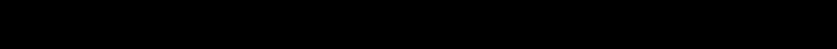
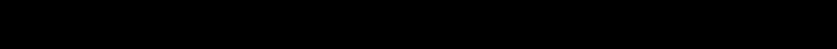
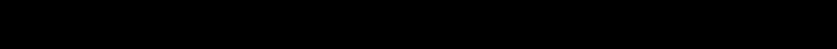

In [15]:
alojamientos_df = pd.read_csv("listings.csv")

In [16]:
alojamientos_df.head()

id                                          name  host_id  \
0  21853                          Bright and airy room    83531   
1  30320                         Apartamentos Dana Sol   130907   
2  30959               Beautiful loft in Madrid Center   132883   
3  40916                   Apartasol Apartamentos Dana   130907   
4  62423  MAGIC ARTISTIC HOUSE IN THE CENTER OF MADRID   303845   

         host_name neighbourhood_group neighbourhood  latitude  longitude  \
0            Abdel              Latina      Cármenes  40.40381   -3.74130   
1  Danuta Weronika              Centro           Sol  40.41476   -3.70418   
2           Angela              Centro   Embajadores  40.41259   -3.70105   
3  Danuta Weronika              Centro   Universidad  40.42247   -3.70577   
4           Arturo              Centro      Justicia  40.41884   -3.69655   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    NaN               4                 33  2018-07-15   
1  Entire home/apt  157.0               5                173  2025-08-27   
2  Entire home/apt    NaN               3                  8  2017-05-30   
3  Entire home/apt  143.0               5                 53  2025-09-11   
4     Private room   65.0               1                249  2025-09-05   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.25                               2               198   
1               0.93                              17               342   
2               0.06                               1                 0   
3               0.29                              17               341   
4               2.78                               3               299   

   number_of_reviews_ltm license  
0                      0     NaN  
1                      1     NaN  
2                      0     NaN  
3                      4     NaN  
4                     41     NaN

In [17]:
alojamientos_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              25000 non-null  int64  
 1   name                            25000 non-null  str    
 2   host_id                         25000 non-null  int64  
 3   host_name                       24903 non-null  str    
 4   neighbourhood_group             25000 non-null  str    
 5   neighbourhood                   25000 non-null  str    
 6   latitude                        25000 non-null  float64
 7   longitude                       25000 non-null  float64
 8   room_type                       25000 non-null  str    
 9   price                           18953 non-null  float64
 10  minimum_nights                  25000 non-null  int64  
 11  number_of_reviews               25000 non-null  int64  
 12  last_review                     19853 non-n

In [40]:
MONGO_URI = "mongodb://localhost:27017/"
DB_NAME = "ayuntamiento"
COLLECTION_NAME = "airbnb"
CSV_PATH = "airbnb.csv"
client = MongoClient(MONGO_URI)
db = client[DB_NAME]
collection = db[COLLECTION_NAME]

print("✅ Conectado a MongoDB")

✅ Conectado a MongoDB


In [18]:
#Convertir a diccionario
records = alojamientos_df.to_dict(orient="records")

In [42]:
#Insertar a Mongo
if records:
    collection.insert_many(records)
    print(f"🚀 Insertados {len(records)} documentos en '{COLLECTION_NAME}'")
else:
    print("⚠️ No hay registros para insertar")

print("🎉 Proceso terminado")

🚀 Insertados 25000 documentos en 'airbnb'
🎉 Proceso terminado


### RETO 3 – VISUALIZA LOS DATOS: MODELO DE GRAFO

In [1]:
!pip install neo4j

  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)

   ---------------------------------------- 0/2 [pytz]
   ---------------------------------------- 0/2 [pytz]
   ---------------------------------------- 0/2 [pytz]
   ---------------------------------------- 0/2 [pytz]
   ---------------------------------------- 0/2 [pytz]
   ---------------------------------------- 0/2 [pytz]
   ---------------------------------------- 0/2 [pytz]
   ---------------------------------------- 0/2 [pytz]
   ---------------------------------------- 0/2 [pytz]
   ---------------------------------------- 0/2 [pytz]
   -------------------- ------------------- 1/2 [neo4j]
   -------------------- ------------------- 1/2 [neo4j]
   -------------------- ------------------- 1/2 [neo4j]
   -------------------- ------------------- 1/2 [neo4j]
   -------------------- ------------------- 1/2 [neo4j]
   -------------------- ------------------- 1/2 [


[notice] A new release of pip is available: 26.0 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
#Ahora creamos un archivo load_graph.py:
from neo4j import GraphDatabase

URI = "bolt://localhost:7687"
USER = "neo4j"
PASSWORD = "abc123456"


# Conectar
driver = GraphDatabase.driver(URI, auth=(USER, PASSWORD))

def ejecutar_consulta(query, parametros=None):
    """Ejecuta una consulta Cypher y retorna resultados"""
    with driver.session() as session:
        resultado = session.run(query, parametros or {})
        return [record.data() for record in resultado]

# Verificar conexión
try:
    ejecutar_consulta("RETURN 'Conectado exitosamente' AS mensaje")
    print("✅ Conectado a Neo4j")
except Exception as e:
    print(f"❌ Error: {e}")
    print("Verifica que Neo4j esté corriendo y las credenciales sean correctas")

✅ Conectado a Neo4j


In [39]:
#Creacion de nodos
#Nodo Barrio
run_query("""
CREATE (b1:Barrio {nombre: "Salamanca"})
CREATE (b2:Barrio {nombre: "Chamberí"})
CREATE (b3:Barrio {nombre: "Centro"})
""")
#Nodo Locales
run_query("""
CREATE (l1:Local {nombre: "Cafetería Goya", tipo_actividad: "Restauración",
horario: "08:00-22:00", licencia: "Concedida"})
CREATE (l2:Local {nombre: "Librería Central", tipo_actividad: "Cultura",
horario: "10:00-20:00", licencia: "En trámite"})
""")
#Nodo Terraza
run_query("""
CREATE (t1:Terraza {nombre: "Terraza Sol", capacidad: 30, estado_licencia: "Concedida"})
CREATE (t2:Terraza {nombre: "Terraza Norte", capacidad: 20, estado_licencia: "En trámite"})
""")
#Nodo Alojamiento
run_query("""
CREATE (a1:Alojamiento {nombre: "Airbnb Retiro", precio: 120,
numero_habitaciones: 2, reseñas: 45, servicios: ["WiFi", "Cocina"]})
CREATE (a2:Alojamiento {nombre: "Apartamento Goya", precio: 80,
numero_habitaciones: 1, reseñas: 0, servicios: ["Aire acondicionado"]})
""")


In [40]:
#Creacion de relaciones y sus atributos
#Atributo ubicado_en
run_query("""
MATCH (b:Barrio {nombre: "Salamanca"}), (l:Local {nombre: "Cafetería Goya"})
CREATE (l)-[:Ubicado_en {distancia: 0.5}]->(b)
""")
#Atributo ubicado_en
run_query("""
MATCH (b:Barrio {nombre: "Centro"}), (a:Alojamiento {nombre: "Airbnb Retiro"})
CREATE (a)-[:Ubicado_en {distancia: 0.3}]->(b)
""")
#Atributo cercano_a
run_query("""
MATCH (l:Local {nombre: "Cafetería Goya"}), (t:Terraza {nombre: "Terraza Sol"})
CREATE (l)-[:Cercano_a {distancia: 0.2}]->(t)
""")
#Atributo cercano_a
run_query("""
MATCH (a:Alojamiento {nombre: "Airbnb Retiro"}), (l:Local {nombre: "Librería Central"})
CREATE (a)-[:Cercano_a {distancia: 0.1}]->(l)
""")
#Atributo relacionado_con
run_query("""
MATCH (l:Local {tipo_actividad: "Restauración"}), (t:Terraza {nombre: "Terraza Sol"})
CREATE (l)-[:Relacionado_con {motivo: "Ambiente de comida"}]->(t)
""")
